In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# LOJİSTİK REGRESYON MODEL

In [3]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df.dropna()
df.head()
#outcome 1 ise diyabet vardır.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

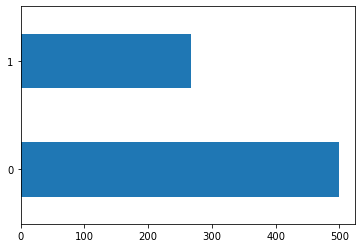

In [12]:
df["Outcome"].value_counts().plot.barh();

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:
y=df["Outcome"]
X=df.drop(["Outcome"], axis=1)

In [15]:
#statsmodel
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                 0.05922
Time:                        12:52:49   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [16]:
#burada bir lojistik regresyon mantığı olduğu için tüm değerler 0 ve 1 aralığına dönüştürülmüştür. 
#Tekrar yorum yapabilmek için, tekrardan onları normal değerlerine dönüştürmemiz gerekmektedir.

In [18]:
#scikitleartn
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model =loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [19]:
loj_model.intercept_

array([-5.88679617])

In [20]:
#bağımsız değişkenlerin katsayısı
loj_model.coef_

array([[ 1.16994476e-01,  2.83733435e-02, -1.68981359e-02,
         7.55145090e-04, -6.41407258e-04,  5.97201268e-02,
         6.76128123e-01,  7.23498971e-03]])

# LOJİSTİK REGRESYON TAHMİN & MODEL TUNİNG

In [21]:
y_pred = loj_model.predict(X)

In [22]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [23]:
#doğru sınıflandırma oranı
accuracy_score(y, y_pred)

0.7747395833333334

In [24]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [27]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [26]:
#0 - 1 değerlerinin normal olasılık değerleri aslında bunlardı. baştaki 0 sınıfına ait olasılık, sağdaki 1 sınıfına ait olasılık
loj_model.predict_proba(X)[0:10]

array([[0.3505852 , 0.6494148 ],
       [0.91692518, 0.08307482],
       [0.22489628, 0.77510372],
       [0.92127453, 0.07872547],
       [0.16759435, 0.83240565],
       [0.79886109, 0.20113891],
       [0.8800353 , 0.1199647 ],
       [0.27795677, 0.72204323],
       [0.32053464, 0.67946536],
       [0.92264521, 0.07735479]])

In [28]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [29]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [30]:
y_probs[0:10]

array([0.6494148 , 0.08307482, 0.77510372, 0.07872547, 0.83240565,
       0.20113891, 0.1199647 , 0.72204323, 0.67946536, 0.07735479])

In [32]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]
#eğer sağ taraftaki değer 0.5'ten büyükse, 1 olur

In [33]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [34]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [35]:
accuracy_score(y, y_pred)

0.7747395833333334

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [37]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.6494148 , 0.08307482, 0.77510372, 0.07872547, 0.83240565])

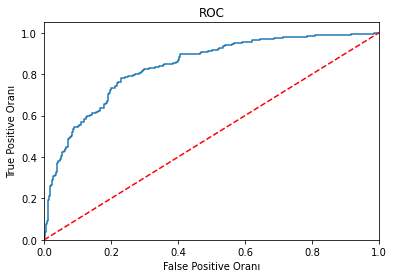

In [38]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [40]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [41]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [42]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7704710144927536

# Gaussian Naive Bayes


In [43]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [46]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [47]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [48]:
y_pred = nb_model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [50]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN MODEL TAHMİN

In [51]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [52]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [53]:
y_pred = knn_model.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# KNN MODEL TUNİNG

In [70]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [71]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [72]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [73]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [74]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [75]:
y_pred = knn_tuned.predict(X_test)

In [76]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# SVC MODEL & TAHMİN

In [77]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [78]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [79]:
svm_model

SVC(kernel='linear')

In [80]:
y_pred = svm_model.predict(X_test)

In [81]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# SVC MODEL TUNİNG

In [82]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [86]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5}


In [87]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [89]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC MODEL TAHMİN

In [90]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [91]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [92]:
svc_model

SVC()

In [93]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# RBF SVC MODEL TUNİNG

In [94]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [95]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [96]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [97]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [98]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# YAPAY SİNİR AĞLARI MODELİ VE TAHMİNİ

In [99]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [100]:
from sklearn.preprocessing import StandardScaler  

In [101]:
scaler = StandardScaler()

In [102]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [104]:
from sklearn.neural_network import MLPClassifier

In [105]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [106]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7359307359307359

# YAPAY SİNİR AĞLARI MODEL TUNİNG

In [111]:
mlpc.hidden_layer_sizes
#hidden_layer_size bize gizli katman sayısıdır= burada 100 tane gerekir. İlk bakmamız gereken parametre budur.

(100,)

In [108]:
?mlpc

In [109]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [110]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [112]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [126]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.0001, 
                           hidden_layer_sizes = (100, 100),
                          solver = "adam")
#aslında sgd denedim ama çok düşük geldi ?

In [127]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100))

In [128]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7445887445887446

# CART MODEL & TAHMİN

In [129]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [132]:
cart_model

DecisionTreeClassifier()

In [133]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[2] <= 
    65.0 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 1 if x[2] <= 67.0 else 0) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 0 if 
    x[3] <= 14.5 else 1) if x[5] <= 30.300000190734863 else 1 if x[5] <= 
    32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[0] <= 0.5 else
    1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else 1) if x[7] <=
    28.5 else (1 if x[7] <= 29.5 else (0 if x[1] <= 133.0 else (1 if x[2] <=
    74.0 else 0) if x[0] <= 4.5 else 0) if x[2] <= 94.0 else 1 if x[6] <= 
    0.6269999742507935 else 0) if x[5] <= 26.949999809265137 else (1 if x[1
    ]

In [134]:
x = [9]

In [135]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [136]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6883116883116883

# CART MODEL TUNİNG

In [137]:
cart_model

DecisionTreeClassifier()

In [138]:
?cart_model

In [139]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [140]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [141]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [142]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [143]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# RANDOM FORESTS MODEL TAHMİN

In [146]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [149]:
rf_model

RandomForestClassifier()

In [150]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

# RANDOM FORESTS MODEL TUNİNG

In [151]:
rf_model

RandomForestClassifier()

In [152]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [154]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [155]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [156]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 1000}


In [157]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 2, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=10,
                       n_estimators=1000)

In [158]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [159]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

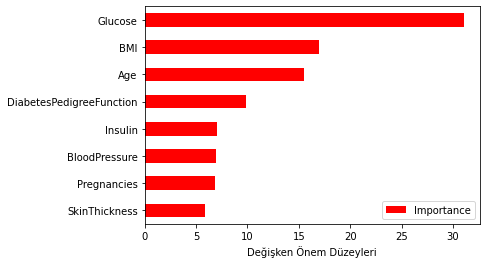

In [160]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# GBM MODEL & TAHMİN

In [161]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [164]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# Model Tuning

In [165]:
gbm_model

GradientBoostingClassifier()

In [166]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [167]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [168]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [169]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [212]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 100)

In [213]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [214]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# XGBOOST MODEL VE TAHMİNİ

In [173]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [174]:
#!pip install xgboost
from xgboost import XGBClassifier

In [175]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [176]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [177]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

# XGBOOST MODEL TUNİNG

In [178]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [179]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [180]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [181]:
xgb_cv_model.fit(X_train, y_train)
#ÇOK SÜRDÜĞÜ İÇİN YAPMADIM.

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


KeyboardInterrupt: 

In [215]:
xgb_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [216]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [217]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [218]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# LİGHTGBM MODEL & TAHMİN

In [219]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [220]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [221]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [222]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

# LİGHTGBM MODEL TUNİNG

In [223]:
lgbm_model

LGBMClassifier()

In [ ]:
?lgbm_model

In [224]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [225]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [226]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


KeyboardInterrupt: 

In [ ]:
lgbm_cv_model.best_params_

In [227]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [228]:
lgbm_tuned = lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [229]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# CATBOOST MODEL & TAHMİN

In [230]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [231]:
#!pip install catboost
from catboost import CatBoostClassifier

In [232]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 169ms	remaining: 2m 48s
1:	learn: 0.6843414	total: 174ms	remaining: 1m 26s
2:	learn: 0.6805760	total: 179ms	remaining: 59.3s
3:	learn: 0.6765782	total: 186ms	remaining: 46.3s
4:	learn: 0.6720829	total: 190ms	remaining: 37.8s
5:	learn: 0.6681617	total: 193ms	remaining: 32s
6:	learn: 0.6641912	total: 195ms	remaining: 27.7s
7:	learn: 0.6602881	total: 198ms	remaining: 24.5s
8:	learn: 0.6562626	total: 200ms	remaining: 22.1s
9:	learn: 0.6528483	total: 203ms	remaining: 20.1s
10:	learn: 0.6487823	total: 205ms	remaining: 18.5s
11:	learn: 0.6454980	total: 208ms	remaining: 17.1s
12:	learn: 0.6418953	total: 210ms	remaining: 15.9s
13:	learn: 0.6374431	total: 212ms	remaining: 14.9s
14:	learn: 0.6339676	total: 214ms	remaining: 14.1s
15:	learn: 0.6304252	total: 216ms	remaining: 13.3s
16:	learn: 0.6266998	total: 218ms	remaining: 12.6s
17:	learn: 0.6237660	total: 221ms	remaining: 12.1s
18:	learn: 0.6204394	total: 223ms	remaining: 11.5s
19:	learn: 0.

175:	learn: 0.3952873	total: 690ms	remaining: 3.23s
176:	learn: 0.3945194	total: 692ms	remaining: 3.22s
177:	learn: 0.3937662	total: 695ms	remaining: 3.21s
178:	learn: 0.3930186	total: 699ms	remaining: 3.2s
179:	learn: 0.3923731	total: 701ms	remaining: 3.19s
180:	learn: 0.3918567	total: 704ms	remaining: 3.18s
181:	learn: 0.3910109	total: 706ms	remaining: 3.17s
182:	learn: 0.3904347	total: 709ms	remaining: 3.17s
183:	learn: 0.3898631	total: 712ms	remaining: 3.16s
184:	learn: 0.3889877	total: 715ms	remaining: 3.15s
185:	learn: 0.3883860	total: 718ms	remaining: 3.14s
186:	learn: 0.3876585	total: 720ms	remaining: 3.13s
187:	learn: 0.3871096	total: 722ms	remaining: 3.12s
188:	learn: 0.3866930	total: 725ms	remaining: 3.11s
189:	learn: 0.3860056	total: 728ms	remaining: 3.1s
190:	learn: 0.3854310	total: 731ms	remaining: 3.1s
191:	learn: 0.3848506	total: 733ms	remaining: 3.08s
192:	learn: 0.3842016	total: 735ms	remaining: 3.08s
193:	learn: 0.3836819	total: 738ms	remaining: 3.06s
194:	learn: 0.3

349:	learn: 0.3222736	total: 1.2s	remaining: 2.23s
350:	learn: 0.3219319	total: 1.21s	remaining: 2.23s
351:	learn: 0.3216924	total: 1.21s	remaining: 2.22s
352:	learn: 0.3214005	total: 1.21s	remaining: 2.22s
353:	learn: 0.3212561	total: 1.21s	remaining: 2.21s
354:	learn: 0.3210802	total: 1.22s	remaining: 2.21s
355:	learn: 0.3208611	total: 1.22s	remaining: 2.2s
356:	learn: 0.3207409	total: 1.22s	remaining: 2.2s
357:	learn: 0.3204410	total: 1.22s	remaining: 2.19s
358:	learn: 0.3201386	total: 1.23s	remaining: 2.19s
359:	learn: 0.3199546	total: 1.23s	remaining: 2.18s
360:	learn: 0.3196740	total: 1.23s	remaining: 2.18s
361:	learn: 0.3193086	total: 1.23s	remaining: 2.17s
362:	learn: 0.3190555	total: 1.23s	remaining: 2.17s
363:	learn: 0.3186316	total: 1.24s	remaining: 2.16s
364:	learn: 0.3182750	total: 1.24s	remaining: 2.16s
365:	learn: 0.3179150	total: 1.24s	remaining: 2.15s
366:	learn: 0.3176213	total: 1.24s	remaining: 2.15s
367:	learn: 0.3174330	total: 1.25s	remaining: 2.14s
368:	learn: 0.3

521:	learn: 0.2785238	total: 1.71s	remaining: 1.56s
522:	learn: 0.2784354	total: 1.71s	remaining: 1.56s
523:	learn: 0.2782083	total: 1.71s	remaining: 1.55s
524:	learn: 0.2779862	total: 1.71s	remaining: 1.55s
525:	learn: 0.2778577	total: 1.72s	remaining: 1.55s
526:	learn: 0.2776799	total: 1.72s	remaining: 1.54s
527:	learn: 0.2774047	total: 1.72s	remaining: 1.54s
528:	learn: 0.2770705	total: 1.72s	remaining: 1.53s
529:	learn: 0.2767879	total: 1.73s	remaining: 1.53s
530:	learn: 0.2765573	total: 1.73s	remaining: 1.53s
531:	learn: 0.2762926	total: 1.73s	remaining: 1.52s
532:	learn: 0.2760226	total: 1.73s	remaining: 1.52s
533:	learn: 0.2759634	total: 1.73s	remaining: 1.51s
534:	learn: 0.2755854	total: 1.74s	remaining: 1.51s
535:	learn: 0.2753839	total: 1.74s	remaining: 1.51s
536:	learn: 0.2748993	total: 1.74s	remaining: 1.5s
537:	learn: 0.2747174	total: 1.75s	remaining: 1.5s
538:	learn: 0.2745669	total: 1.75s	remaining: 1.5s
539:	learn: 0.2742959	total: 1.75s	remaining: 1.49s
540:	learn: 0.2

728:	learn: 0.2357625	total: 2.23s	remaining: 829ms
729:	learn: 0.2356657	total: 2.25s	remaining: 830ms
730:	learn: 0.2355083	total: 2.25s	remaining: 827ms
731:	learn: 0.2354345	total: 2.25s	remaining: 825ms
732:	learn: 0.2353153	total: 2.26s	remaining: 823ms
733:	learn: 0.2352290	total: 2.26s	remaining: 820ms
734:	learn: 0.2351001	total: 2.27s	remaining: 817ms
735:	learn: 0.2349968	total: 2.27s	remaining: 814ms
736:	learn: 0.2349104	total: 2.27s	remaining: 812ms
737:	learn: 0.2348057	total: 2.28s	remaining: 809ms
738:	learn: 0.2346429	total: 2.28s	remaining: 806ms
739:	learn: 0.2344062	total: 2.29s	remaining: 803ms
740:	learn: 0.2343251	total: 2.29s	remaining: 800ms
741:	learn: 0.2339286	total: 2.29s	remaining: 797ms
742:	learn: 0.2337558	total: 2.29s	remaining: 794ms
743:	learn: 0.2336824	total: 2.3s	remaining: 790ms
744:	learn: 0.2336136	total: 2.3s	remaining: 787ms
745:	learn: 0.2334585	total: 2.3s	remaining: 784ms
746:	learn: 0.2330439	total: 2.3s	remaining: 781ms
747:	learn: 0.23

929:	learn: 0.2019405	total: 2.74s	remaining: 206ms
930:	learn: 0.2018581	total: 2.74s	remaining: 203ms
931:	learn: 0.2015040	total: 2.74s	remaining: 200ms
932:	learn: 0.2012963	total: 2.74s	remaining: 197ms
933:	learn: 0.2011157	total: 2.75s	remaining: 194ms
934:	learn: 0.2010048	total: 2.75s	remaining: 191ms
935:	learn: 0.2008797	total: 2.75s	remaining: 188ms
936:	learn: 0.2006119	total: 2.75s	remaining: 185ms
937:	learn: 0.2003997	total: 2.76s	remaining: 182ms
938:	learn: 0.2002994	total: 2.76s	remaining: 179ms
939:	learn: 0.2001781	total: 2.76s	remaining: 176ms
940:	learn: 0.2001108	total: 2.77s	remaining: 173ms
941:	learn: 0.1998029	total: 2.77s	remaining: 170ms
942:	learn: 0.1996730	total: 2.77s	remaining: 167ms
943:	learn: 0.1996001	total: 2.77s	remaining: 164ms
944:	learn: 0.1995043	total: 2.77s	remaining: 161ms
945:	learn: 0.1993791	total: 2.78s	remaining: 159ms
946:	learn: 0.1993067	total: 2.78s	remaining: 156ms
947:	learn: 0.1991825	total: 2.78s	remaining: 153ms
948:	learn: 

In [233]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

# CATBOOST MODEL TUNİNG

In [234]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [235]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


KeyboardInterrupt: 

In [236]:
catb_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [237]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6616270	total: 2.71ms	remaining: 539ms
1:	learn: 0.6400322	total: 5.21ms	remaining: 516ms
2:	learn: 0.6218089	total: 7.72ms	remaining: 507ms
3:	learn: 0.6091426	total: 10.3ms	remaining: 505ms
4:	learn: 0.5937764	total: 12.9ms	remaining: 504ms
5:	learn: 0.5776944	total: 15.6ms	remaining: 504ms
6:	learn: 0.5640806	total: 18.3ms	remaining: 504ms
7:	learn: 0.5465023	total: 20.9ms	remaining: 502ms
8:	learn: 0.5342910	total: 23.6ms	remaining: 501ms
9:	learn: 0.5253110	total: 26.3ms	remaining: 499ms
10:	learn: 0.5152173	total: 40.4ms	remaining: 695ms
11:	learn: 0.5038768	total: 43.5ms	remaining: 681ms
12:	learn: 0.4940545	total: 47.1ms	remaining: 678ms
13:	learn: 0.4868880	total: 49ms	remaining: 651ms
14:	learn: 0.4799839	total: 50.7ms	remaining: 625ms
15:	learn: 0.4744068	total: 52.6ms	remaining: 605ms
16:	learn: 0.4684004	total: 54.3ms	remaining: 585ms
17:	learn: 0.4618850	total: 56.5ms	remaining: 571ms
18:	learn: 0.4560376	total: 59.2ms	remaining: 564ms
19:	learn: 0.4520084	tot

173:	learn: 0.2257754	total: 348ms	remaining: 52ms
174:	learn: 0.2252312	total: 350ms	remaining: 50ms
175:	learn: 0.2233510	total: 352ms	remaining: 47.9ms
176:	learn: 0.2228426	total: 353ms	remaining: 45.9ms
177:	learn: 0.2223245	total: 355ms	remaining: 43.9ms
178:	learn: 0.2206959	total: 357ms	remaining: 41.9ms
179:	learn: 0.2199697	total: 359ms	remaining: 39.9ms
180:	learn: 0.2193349	total: 361ms	remaining: 37.9ms
181:	learn: 0.2184913	total: 363ms	remaining: 35.9ms
182:	learn: 0.2180382	total: 366ms	remaining: 34ms
183:	learn: 0.2175915	total: 369ms	remaining: 32.1ms
184:	learn: 0.2170264	total: 374ms	remaining: 30.3ms
185:	learn: 0.2166247	total: 378ms	remaining: 28.4ms
186:	learn: 0.2162110	total: 380ms	remaining: 26.4ms
187:	learn: 0.2155026	total: 384ms	remaining: 24.5ms
188:	learn: 0.2152076	total: 387ms	remaining: 22.5ms
189:	learn: 0.2138091	total: 389ms	remaining: 20.5ms
190:	learn: 0.2122243	total: 392ms	remaining: 18.4ms
191:	learn: 0.2109937	total: 395ms	remaining: 16.5ms

In [238]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# Tüm Modellerin Karşılaştırılması

In [239]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))
    #son 3 model çok uzun sürer diye eğitmedim, eğitsem accuracy daha da yüksek olabilirdi.

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 34.6320%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 75.3247%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.8918%
----------------------------
CatBoostClassifier:
Accuracy: 74.4589%
----------------------------
LGBMClassifier:
Accuracy: 75.3247%
----------------------------
XGBClassifier:
Accuracy: 75.3247%


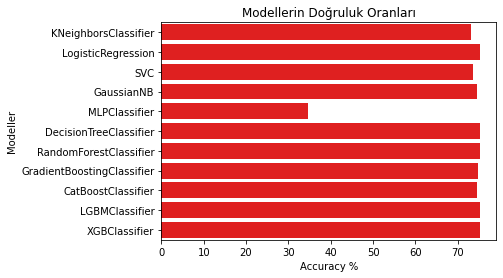

In [240]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    